## 0. Set up

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import subprocess
import seaborn as sns
from pandas_profiling import ProfileReport

#SKlearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Final Project/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
%matplotlib inline

## 1. EDA

In [7]:
data.shape

(8124, 23)

In [8]:
#Basic stats descriptive statistics
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 1.1 Class (Target Variable)

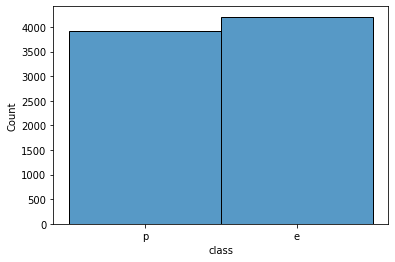

In [10]:
sns.histplot(data=data, x="class") #data is pretty evenly divided between poisonous and edible classes

In [11]:
# Update target variable to poisonous
data.loc[data['class']=='p', 'class'] = 1
data.loc[data['class']=='e', 'class'] = 0
data=data.rename(columns={'class':'poisonous'})

### 1.2 Cap-shape*
bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

Consider consolidate the categories

In [12]:
# Only 4 observations for cap-shape = c
# Only 32 observations for cap-shape = s

print(data['cap-shape'].value_counts(),'\n',data['cap-shape'].value_counts(normalize=True)*100)

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 
 x    45.002462
f    38.798621
k    10.192024
b     5.563762
s     0.393895
c     0.049237
Name: cap-shape, dtype: float64


In [13]:
# Combine the rare classes so that every class has > 5% samples
data.loc[(data['cap-shape'] =='s') | (data['cap-shape'] =='c')| (data['cap-shape'] =='b'), 'cap-shape'] = 'others'
print(data['cap-shape'].value_counts(),'\n',data['cap-shape'].value_counts(normalize=True)*100)

x         3656
f         3152
k          828
others     488
Name: cap-shape, dtype: int64 
 x         45.002462
f         38.798621
k         10.192024
others     6.006893
Name: cap-shape, dtype: float64


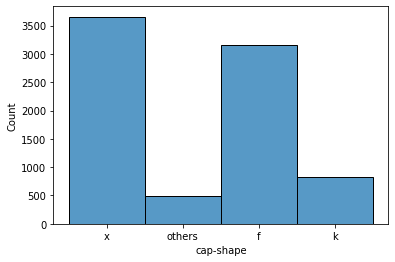

In [14]:
sns.histplot(data=data, x="cap-shape")

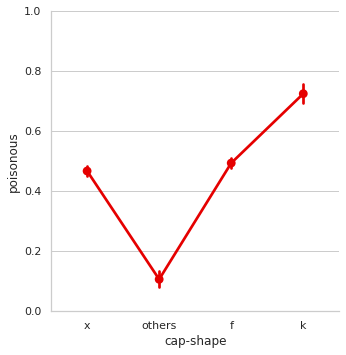

In [15]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['cap-shape'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

In [16]:
is_poisonous = data[data['poisonous'] ==1]
not_poisonous = data[data['poisonous'] ==0]

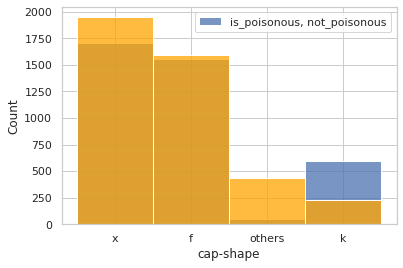

In [17]:
sns.histplot(data = is_poisonous, x = 'cap-shape')
sns.histplot(data = not_poisonous, x = 'cap-shape', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.3 Cap-surface*
fibrous=f,grooves=g,scaly=y,smooth=s

In [18]:
# Only 4 observations for cap-surface = g
print(data['cap-surface'].value_counts(),'\n',data['cap-surface'].value_counts(normalize=True)*100)

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 
 y    39.931068
s    31.462334
f    28.557361
g     0.049237
Name: cap-surface, dtype: float64


In [19]:
# Combine the rare classes so that every class has > 5% samples
data.loc[(data['cap-surface'] =='g') | (data['cap-surface'] =='f'), 'cap-surface'] = 'others'
print(data['cap-surface'].value_counts(),'\n',data['cap-surface'].value_counts(normalize=True)*100)

y         3244
s         2556
others    2324
Name: cap-surface, dtype: int64 
 y         39.931068
s         31.462334
others    28.606598
Name: cap-surface, dtype: float64


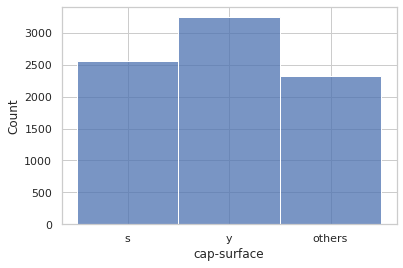

In [20]:
sns.histplot(data=data, x="cap-surface")

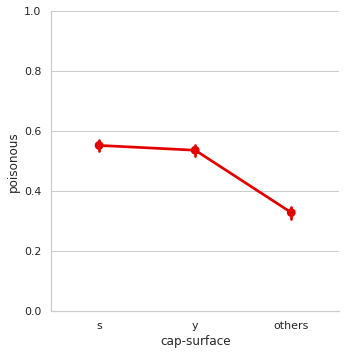

In [21]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['cap-surface'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

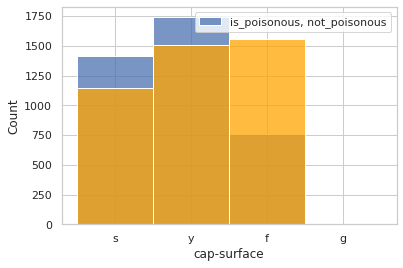

In [22]:
sns.histplot(data = is_poisonous, x = 'cap-surface')
sns.histplot(data = not_poisonous, x = 'cap-surface', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.4 Cap-color*
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

Consider consolidate the categories

In [23]:
print(data['cap-color'].value_counts(),'\n',data['cap-color'].value_counts(normalize=True)*100)

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 
 n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
u     0.196947
r     0.196947
Name: cap-color, dtype: float64


In [24]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['cap-color'].isin(['r','u', 'c', 'p', 'b']), 'cap-color'] = 'others'

print(data['cap-color'].value_counts(),'\n',data['cap-color'].value_counts(normalize=True)*100)

n         2284
g         1840
e         1500
y         1072
w         1040
others     388
Name: cap-color, dtype: int64 
 n         28.114229
g         22.648941
e         18.463811
y         13.195470
w         12.801576
others     4.775972
Name: cap-color, dtype: float64


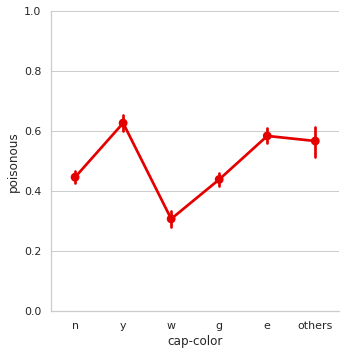

In [25]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['cap-color'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

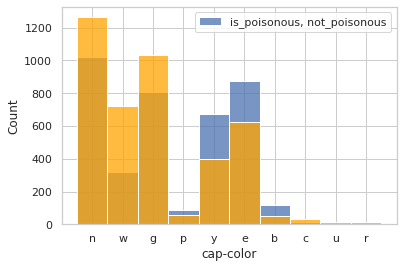

In [26]:
sns.histplot(data = is_poisonous, x = 'cap-color')
sns.histplot(data = not_poisonous, x = 'cap-color', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.5 Bruises

In [27]:
print(data['bruises'].value_counts(),'\n',data['bruises'].value_counts(normalize=True)*100)

f    4748
t    3376
Name: bruises, dtype: int64 
 f    58.444116
t    41.555884
Name: bruises, dtype: float64


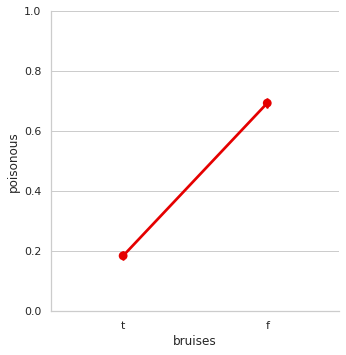

In [28]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['bruises'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

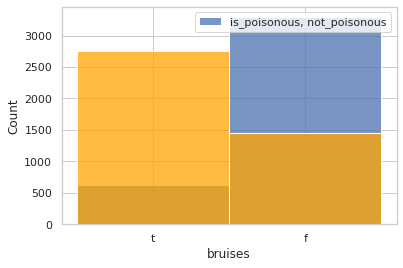

In [29]:
sns.histplot(data = is_poisonous, x = 'bruises')
sns.histplot(data = not_poisonous, x = 'bruises', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.6 Odor*
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

Consider consolidate the categories

In [30]:
print(data['odor'].value_counts(),'\n',data['odor'].value_counts(normalize=True)*100)

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 
 n    43.426883
f    26.587888
y     7.090103
s     7.090103
a     4.923683
l     4.923683
p     3.151157
c     2.363368
m     0.443131
Name: odor, dtype: float64


In [31]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['odor'].isin(['m','c', 'p']), 'odor'] = 'others'

print(data['odor'].value_counts(),'\n',data['odor'].value_counts(normalize=True)*100)

n         3528
f         2160
y          576
s          576
others     484
a          400
l          400
Name: odor, dtype: int64 
 n         43.426883
f         26.587888
y          7.090103
s          7.090103
others     5.957656
a          4.923683
l          4.923683
Name: odor, dtype: float64


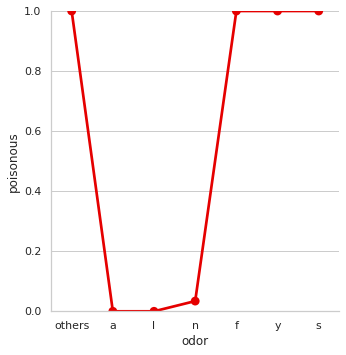

In [32]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['odor'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

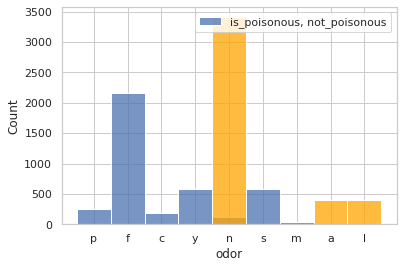

In [33]:
sns.histplot(data = is_poisonous, x = 'odor')
sns.histplot(data = not_poisonous, x = 'odor', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.7 Gill-attachment
attached=a, descending=d, free=f, notched=n

In [34]:
# Only 2 categories present in data
print(data['gill-attachment'].value_counts(),'\n',data['gill-attachment'].value_counts(normalize=True)*100)

f    7914
a     210
Name: gill-attachment, dtype: int64 
 f    97.415066
a     2.584934
Name: gill-attachment, dtype: float64


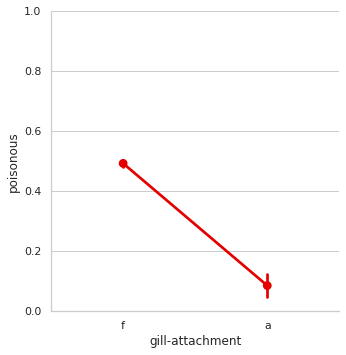

In [35]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=data, x_vars=['gill-attachment'], y_vars='poisonous', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

### 1.8 Gill-spacing

In [36]:
data['gill-spacing'].isna().sum()

0

In [37]:
data['gill-spacing'].value_counts(normalize=True)*100

c    83.85032
w    16.14968
Name: gill-spacing, dtype: float64

[(0.0, 1.0)]

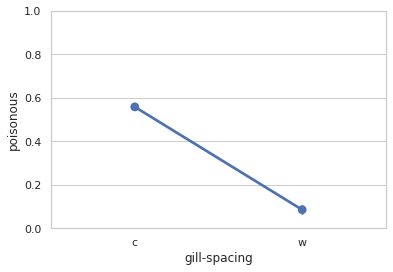

In [38]:
g = sns.pointplot(x='gill-spacing', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

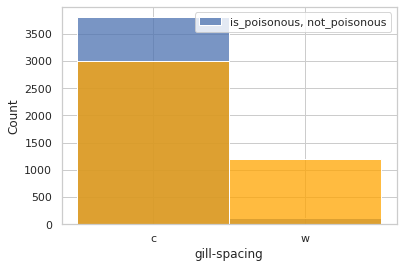

In [39]:
sns.histplot(data = is_poisonous, x = 'gill-spacing')
sns.histplot(data = not_poisonous, x = 'gill-spacing', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.9 Gill-size

In [40]:
data['gill-size'].isna().sum()

0

In [41]:
data['gill-size'].value_counts(normalize=True)*100

b    69.079271
n    30.920729
Name: gill-size, dtype: float64

[(0.0, 1.0)]

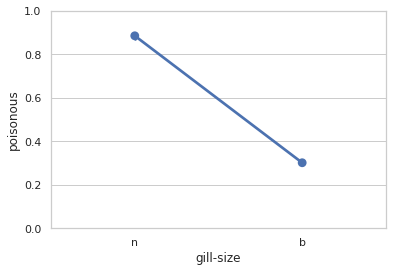

In [42]:
g = sns.pointplot(x='gill-size', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

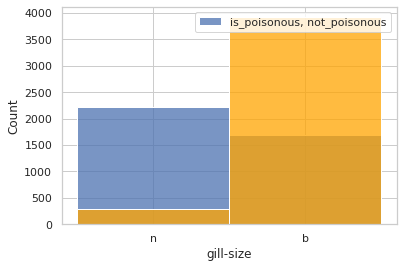

In [43]:
sns.histplot(data = is_poisonous, x = 'gill-size')
sns.histplot(data = not_poisonous, x = 'gill-size', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.10 Gill-color*

In [44]:
data['gill-color'].isna().sum()

0

In [45]:
data['gill-color'].value_counts(normalize=True)*100

b    21.270310
p    18.365337
w    14.795667
n    12.900049
g     9.256524
h     9.010340
u     6.056130
k     5.022157
e     1.181684
y     1.058592
o     0.787789
r     0.295421
Name: gill-color, dtype: float64

In [46]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['gill-color'].isin(['r','o', 'y', 'e', 'k']), 'gill-color'] = 'others'

print(data['gill-color'].value_counts(),'\n',data['gill-color'].value_counts(normalize=True)*100)

b         1728
p         1492
w         1202
n         1048
g          752
h          732
others     678
u          492
Name: gill-color, dtype: int64 
 b         21.270310
p         18.365337
w         14.795667
n         12.900049
g          9.256524
h          9.010340
others     8.345643
u          6.056130
Name: gill-color, dtype: float64


[(0.0, 1.0)]

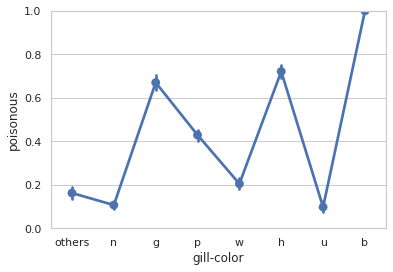

In [47]:
g = sns.pointplot(x='gill-color', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

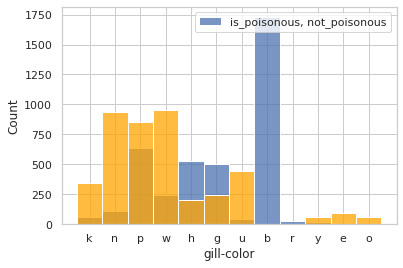

In [48]:
sns.histplot(data = is_poisonous, x = 'gill-color')
sns.histplot(data = not_poisonous, x = 'gill-color', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.11 Stalk-shape

In [49]:
data['stalk-shape'].isna().sum()

0

In [50]:
data['stalk-shape'].value_counts(normalize=True)*100

t    56.720827
e    43.279173
Name: stalk-shape, dtype: float64

[(0.0, 1.0)]

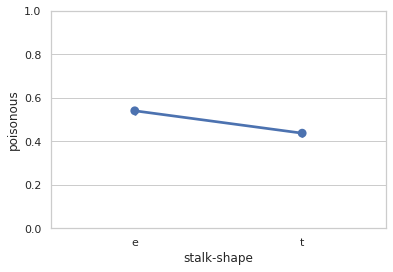

In [51]:
g = sns.pointplot(x='stalk-shape', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

### 1.12 Stalk-root*

In [52]:
data['stalk-root'].isna().sum()

0

In [53]:
data['stalk-root'].value_counts(normalize=True)*100

b    46.479567
?    30.526834
e    13.786312
c     6.843919
r     2.363368
Name: stalk-root, dtype: float64

In [54]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['stalk-root'].isin(['r','c']), 'stalk-root'] = 'others'

print(data['stalk-root'].value_counts(),'\n',data['stalk-root'].value_counts(normalize=True)*100)

b         3776
?         2480
e         1120
others     748
Name: stalk-root, dtype: int64 
 b         46.479567
?         30.526834
e         13.786312
others     9.207287
Name: stalk-root, dtype: float64


[(0.0, 1.0)]

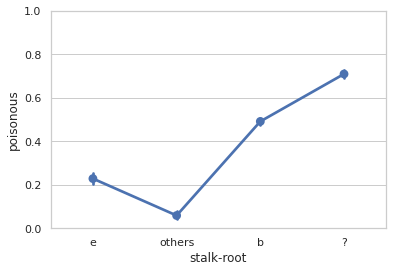

In [55]:
g = sns.pointplot(x='stalk-root', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

### 1.13 Stalk-surface-above-ring*

In [56]:
data['stalk-surface-above-ring'].isna().sum()

0

In [57]:
data['stalk-surface-above-ring'].value_counts(normalize=True)*100

s    63.712457
k    29.197440
f     6.794682
y     0.295421
Name: stalk-surface-above-ring, dtype: float64

In [58]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['stalk-surface-above-ring'].isin(['y','f']), 'stalk-surface-above-ring'] = 'others'

print(data['stalk-surface-above-ring'].value_counts(),'\n',data['stalk-surface-above-ring'].value_counts(normalize=True)*100)

s         5176
k         2372
others     576
Name: stalk-surface-above-ring, dtype: int64 
 s         63.712457
k         29.197440
others     7.090103
Name: stalk-surface-above-ring, dtype: float64


[(0.0, 1.0)]

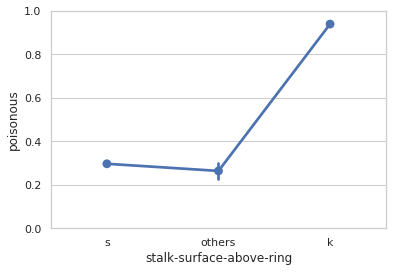

In [59]:
g = sns.pointplot(x='stalk-surface-above-ring', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

### 1.14 Stalk-surface-below-ring*

In [60]:
data['stalk-surface-above-ring'].isna().sum()

0

In [61]:
data['stalk-surface-below-ring'].value_counts(normalize=True)*100

s    60.758247
k    28.360414
f     7.385524
y     3.495815
Name: stalk-surface-below-ring, dtype: float64

In [62]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['stalk-surface-below-ring'].isin(['y','f']), 'stalk-surface-below-ring'] = 'others'

print(data['stalk-surface-below-ring'].value_counts(),'\n',data['stalk-surface-below-ring'].value_counts(normalize=True)*100)

s         4936
k         2304
others     884
Name: stalk-surface-below-ring, dtype: int64 
 s         60.758247
k         28.360414
others    10.881339
Name: stalk-surface-below-ring, dtype: float64


[(0.0, 1.0)]

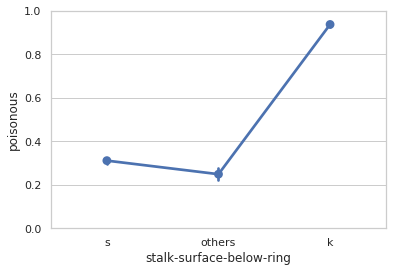

In [63]:
g = sns.pointplot(x='stalk-surface-below-ring', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

### 1.15 Stalk-color-above-ring*

In [64]:
data['stalk-color-above-ring'].isna().sum()

0

In [65]:
data['stalk-color-above-ring'].value_counts(normalize=True)*100

w    54.948301
p    23.042836
g     7.090103
n     5.514525
b     5.317578
o     2.363368
e     1.181684
c     0.443131
y     0.098474
Name: stalk-color-above-ring, dtype: float64

In [66]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['stalk-color-above-ring'].isin(['y','c', 'e', 'o']), 'stalk-color-above-ring'] = 'others'

print(data['stalk-color-above-ring'].value_counts(),'\n',data['stalk-color-above-ring'].value_counts(normalize=True)*100)

w         4464
p         1872
g          576
n          448
b          432
others     332
Name: stalk-color-above-ring, dtype: int64 
 w         54.948301
p         23.042836
g          7.090103
n          5.514525
b          5.317578
others     4.086657
Name: stalk-color-above-ring, dtype: float64


[(0.0, 1.0)]

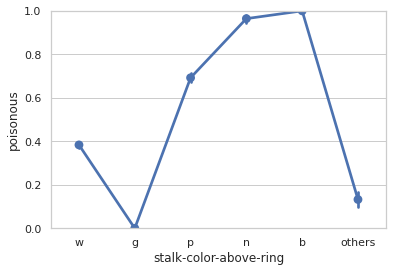

In [67]:
g = sns.pointplot(x='stalk-color-above-ring', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

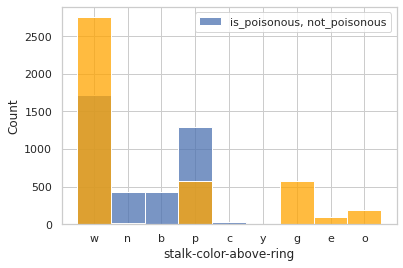

In [68]:
sns.histplot(data = is_poisonous, x = 'stalk-color-above-ring')
sns.histplot(data = not_poisonous, x = 'stalk-color-above-ring', color = "orange")
plt.legend(labels=["is_poisonous, not_poisonous"])

### 1.16 Stalk-color-below-ring

In [69]:
data['stalk-color-below-ring'].isna().sum()

0

In [70]:
data['stalk-color-below-ring'].value_counts(normalize=True)*100

w    53.963565
p    23.042836
g     7.090103
n     6.302314
b     5.317578
o     2.363368
e     1.181684
c     0.443131
y     0.295421
Name: stalk-color-below-ring, dtype: float64

In [71]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['stalk-color-below-ring'].isin(['y','c', 'e', 'o']), 'stalk-color-below-ring'] = 'others'

print(data['stalk-color-below-ring'].value_counts(),'\n',data['stalk-color-below-ring'].value_counts(normalize=True)*100)

w         4384
p         1872
g          576
n          512
b          432
others     348
Name: stalk-color-below-ring, dtype: int64 
 w         53.963565
p         23.042836
g          7.090103
n          6.302314
b          5.317578
others     4.283604
Name: stalk-color-below-ring, dtype: float64


[(0.0, 1.0)]

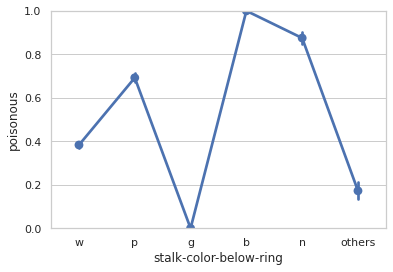

In [72]:
g = sns.pointplot(x='stalk-color-below-ring', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

### 1.17 Veil-type (Dropped)

In [73]:
data['veil-type'].isna().sum()

0

In [74]:
data['veil-type'].value_counts(normalize=True)*100

p    100.0
Name: veil-type, dtype: float64

[(0.0, 1.0)]

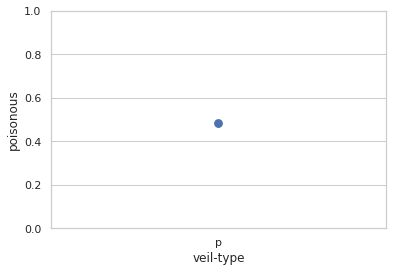

In [75]:
g = sns.pointplot(x='veil-type', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1)) #LOL

In [76]:
data = data.drop('veil-type',1)

### 1.18 Veil-color*

In [77]:
data['veil-color'].isna().sum()

0

In [78]:
data['veil-color'].value_counts(normalize=True)*100

w    97.538159
n     1.181684
o     1.181684
y     0.098474
Name: veil-color, dtype: float64

In [79]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['veil-color'].isin(['y','o', 'n']), 'veil-color'] = 'others'

print(data['veil-color'].value_counts(),'\n',data['veil-color'].value_counts(normalize=True)*100)

w         7924
others     200
Name: veil-color, dtype: int64 
 w         97.538159
others     2.461841
Name: veil-color, dtype: float64


[(0.0, 1.0)]

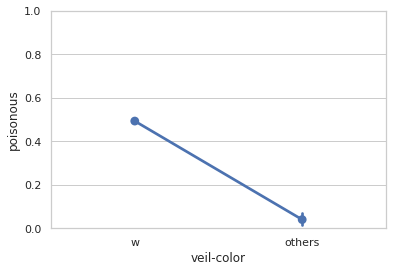

In [80]:
g = sns.pointplot(x='veil-color', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1)) 

### 1.19 Ring-number*

In [81]:
data['ring-number'].isna().sum()

0

In [82]:
data['ring-number'].value_counts(normalize=True)*100

o    92.171344
t     7.385524
n     0.443131
Name: ring-number, dtype: float64

In [83]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['ring-number'].isin(['n','t']), 'ring-number'] = 'others'

print(data['ring-number'].value_counts(),'\n',data['ring-number'].value_counts(normalize=True)*100)

o         7488
others     636
Name: ring-number, dtype: int64 
 o         92.171344
others     7.828656
Name: ring-number, dtype: float64


[(0.0, 1.0)]

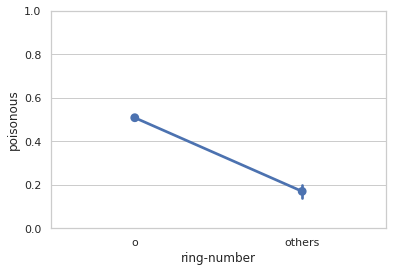

In [84]:
g = sns.pointplot(x='ring-number', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1)) 

### 1.20 Ring-type*


*   Imbalance data: ring-type = 'f' and 'n' have insufficient amount of data points
*   class "l" and "n" have 100% posionous mushrooms 

*   class 'f' has no posionous mushroom







In [85]:
print(data['ring-type'].value_counts(),'\n', data['ring-type'].value_counts(normalize=True)*100)

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64 
 p    48.842935
e    34.170359
l    15.952733
f     0.590842
n     0.443131
Name: ring-type, dtype: float64


In [86]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['ring-type'].isin(['n','f', 'l']), 'ring-type'] = 'others'

print(data['ring-type'].value_counts(),'\n',data['ring-type'].value_counts(normalize=True)*100)

p         3968
e         2776
others    1380
Name: ring-type, dtype: int64 
 p         48.842935
e         34.170359
others    16.986706
Name: ring-type, dtype: float64


[(0.0, 1.0)]

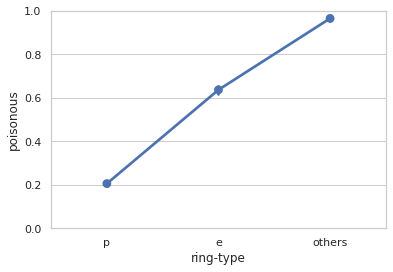

In [87]:
g = sns.pointplot(x='ring-type', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

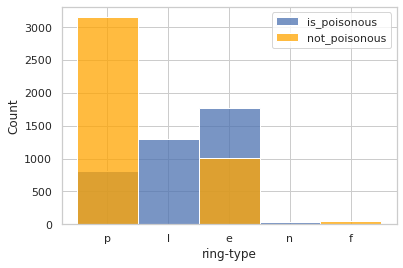

In [88]:
sns.histplot(data = is_poisonous, x = 'ring-type')
sns.histplot(data = not_poisonous, x = 'ring-type', color = "orange")
plt.legend(labels=["is_poisonous", "not_poisonous"])

Text(0, 0.5, 'Count')

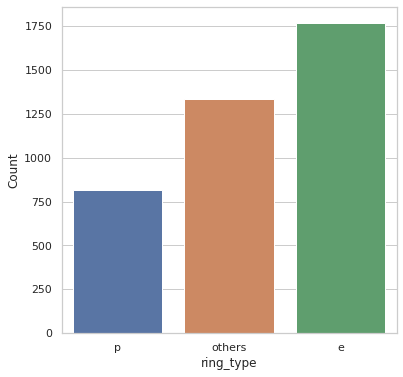

In [89]:
# Ring Type
# poisonous class ring_type components
plt.figure(figsize=(6,6))
df_p = data[data['poisonous']==1]
sns.countplot(df_p['ring-type'])
plt.xlabel('ring_type')
plt.ylabel('Count')

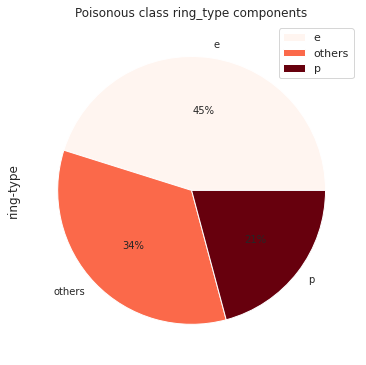

In [90]:
df_p['ring-type'].value_counts().sort_index().plot.pie(title = "Poisonous class ring_type components",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

### 1.21 Spore-print-color*


*   Imbalance class: r, u, o , y, b has insufficent amount of data points
*   Spore-print-color = ['u','o','y','b'] has no posionous mushrooms



In [91]:
print(data['spore-print-color'].value_counts(),'\n', data['spore-print-color'].value_counts(normalize=True)*100)

w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64 
 w    29.394387
n    24.224520
k    23.042836
h    20.088626
r     0.886263
u     0.590842
o     0.590842
y     0.590842
b     0.590842
Name: spore-print-color, dtype: float64


In [92]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['spore-print-color'].isin(['b','y', 'o', 'u','r']), 'spore-print-color'] = 'others'

print(data['spore-print-color'].value_counts(),'\n',data['spore-print-color'].value_counts(normalize=True)*100)

w         2388
n         1968
k         1872
h         1632
others     264
Name: spore-print-color, dtype: int64 
 w         29.394387
n         24.224520
k         23.042836
h         20.088626
others     3.249631
Name: spore-print-color, dtype: float64


[(0.0, 1.0)]

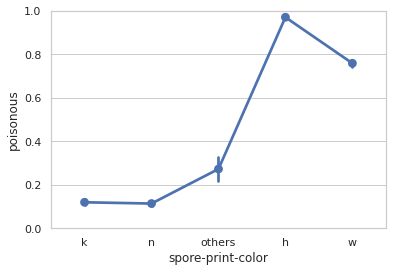

In [93]:
g = sns.pointplot(x='spore-print-color', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

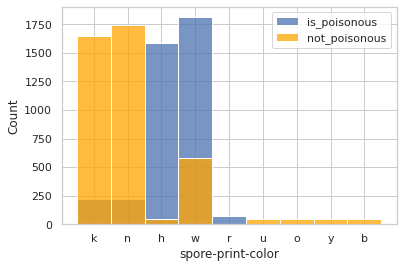

In [94]:
sns.histplot(data = is_poisonous, x = 'spore-print-color')
sns.histplot(data = not_poisonous, x = 'spore-print-color', color = "orange")
plt.legend(labels=["is_poisonous", "not_poisonous"])

Text(0, 0.5, 'Count')

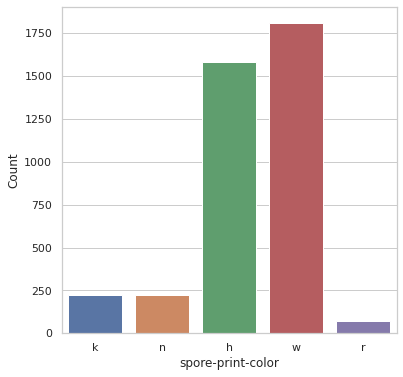

In [95]:
# spore-print-color  
plt.figure(figsize=(6,6))
sns.countplot(df_p['spore-print-color'])
plt.xlabel('spore-print-color')
plt.ylabel('Count')

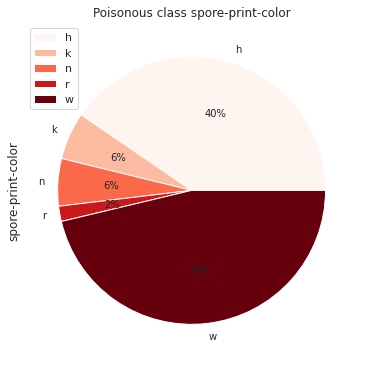

In [96]:
df_p['spore-print-color'].value_counts().sort_index().plot.pie(title = "Poisonous class spore-print-color",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

### 1.22 Population


*   population "n" and "a" have no posionous mushrooms
*   population "v" has high proportion of posionous mushrooms



In [97]:
print(data['population'].value_counts(),'\n', data['population'].value_counts(normalize=True)*100)

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64 
 v    49.729197
y    21.073363
s    15.361891
n     4.923683
a     4.726736
c     4.185130
Name: population, dtype: float64


[(0.0, 1.0)]

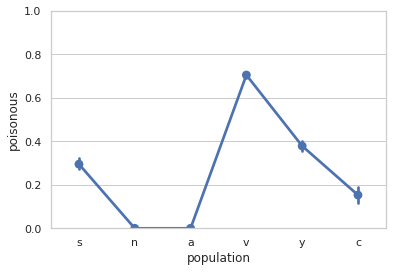

In [98]:
g = sns.pointplot(x='population', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

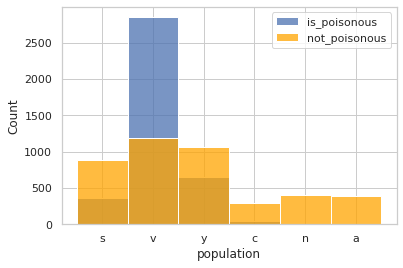

In [99]:
sns.histplot(data = is_poisonous, x = 'population')
sns.histplot(data = not_poisonous, x = 'population', color = "orange")
plt.legend(labels=["is_poisonous", "not_poisonous"])

Text(0, 0.5, 'Count')

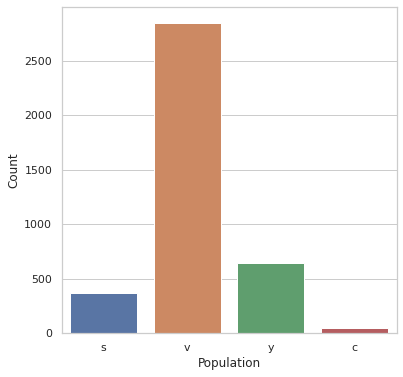

In [100]:
# population
plt.figure(figsize=(6,6))
sns.countplot(df_p['population'])
plt.xlabel('Population')
plt.ylabel('Count')

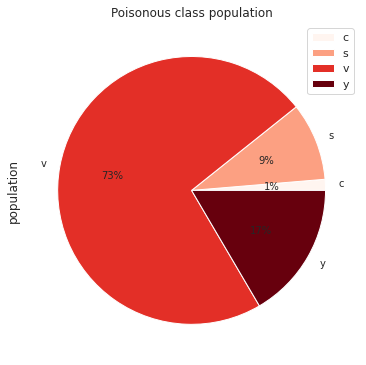

In [101]:
df_p['population'].value_counts().sort_index().plot.pie(title = "Poisonous class population",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

### 1.23 Habitat*


*   habitat = 'w' has no posionous mushrooms in this dataset. However, 'w' is an imbalance class


*   "g""d" "m" are habitats categories that have high percentage of not posionous mushrooms
*   "u","p","i" are habitats where greater proportion mushrooms are  posionous/





In [102]:
print(data['habitat'].value_counts(),'\n', data['habitat'].value_counts(normalize=True)*100)

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64 
 d    38.749385
g    26.440177
p    14.081733
l    10.241260
u     4.529788
m     3.594289
w     2.363368
Name: habitat, dtype: float64


In [103]:
# Combine the rare classes so that every class has > 5% samples
data.loc[data['habitat'].isin(['w','m']), 'habitat'] = 'others'

print(data['habitat'].value_counts(),'\n',data['habitat'].value_counts(normalize=True)*100)

d         3148
g         2148
p         1144
l          832
others     484
u          368
Name: habitat, dtype: int64 
 d         38.749385
g         26.440177
p         14.081733
l         10.241260
others     5.957656
u          4.529788
Name: habitat, dtype: float64


[(0.0, 1.0)]

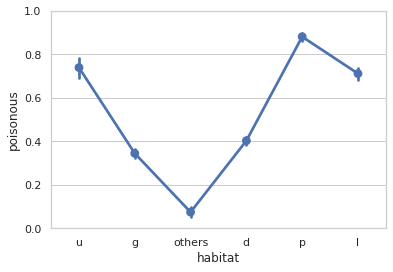

In [104]:
g = sns.pointplot(x='habitat', y='poisonous', data=data, showmeans=True)
g.set(ylim=(0, 1))

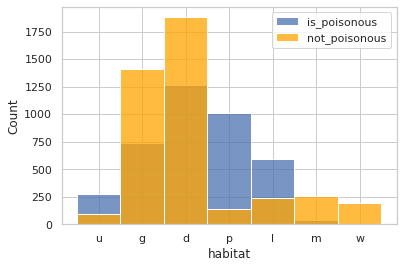

In [105]:
sns.histplot(data = is_poisonous, x = 'habitat')
sns.histplot(data = not_poisonous, x = 'habitat', color = "orange")
plt.legend(labels=["is_poisonous", "not_poisonous"])

Text(0, 0.5, 'Count')

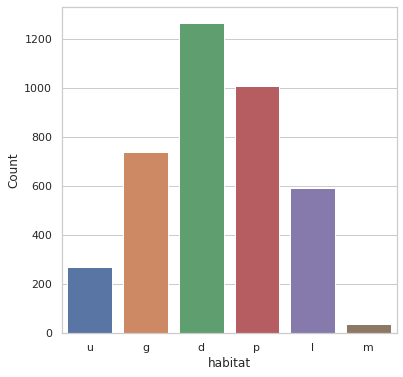

In [106]:
plt.figure(figsize=(6,6))
sns.countplot(df_p['habitat'])
plt.xlabel('habitat')
plt.ylabel('Count')

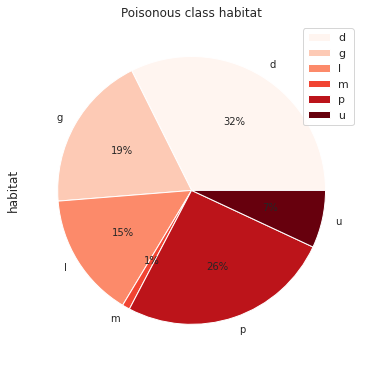

In [107]:
df_p['habitat'].value_counts().sort_index().plot.pie(title = "Poisonous class habitat",
                                                                      legend = True, autopct='%1.0f%%', fontsize=10, colormap = 'Reds',
                                                                      figsize=(6,10))

In [108]:
data.to_csv('./data_feature_engineering.csv')

## 2. Model w| Feature Engineering

In [109]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [110]:
X,y = data.drop('poisonous',1), data['poisonous']

In [113]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [114]:
X = pd.get_dummies(X, prefix = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'])
y=y.astype('int')

In [115]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [116]:
print(train_X.shape)
print(test_X.shape)

(6499, 84)
(1625, 84)


In [117]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [118]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

### 2.1 Logistic Regression

In [119]:
log_reg = LogisticRegression()
log_reg.fit(train_X,train_y)
y_pred_log_reg = log_reg.predict(test_X)
acc_log_reg = round(log_reg.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

99.94 percent


In [120]:
precision_log_reg = metrics.precision_score(test_y, y_pred_log_reg)
recall_log_reg = metrics.recall_score(test_y, y_pred_log_reg)
f1_log_reg = metrics.f1_score(test_y, y_pred_log_reg)

print("Precision:",precision_log_reg)
print("Recall:",recall_log_reg)
print("F1:",f1_log_reg)

Precision: 1.0
Recall: 0.9987096774193548
F1: 0.9993544222078761


In [121]:
compare_RMSE(log_reg,train_X, train_y,test_X,test_y)

Test set RMSE: 0.02480694691784169
CV RMSE: 0.027739282981275454
Training set RMSE: 0.017542509861881023


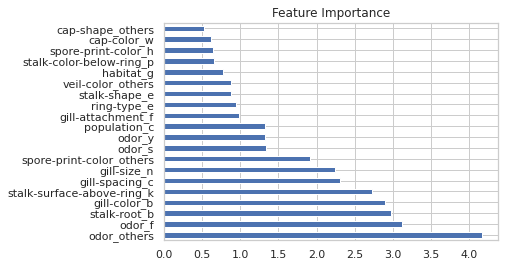

In [122]:
# Feature importance for logistic regression (Coefficients as Feature Importance)
importance = log_reg.coef_[0]
feat_importances = pd.Series(importance, index = train_X.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')


### 2.2 SGDC

In [123]:
SGDC = SGDClassifier()
SGDC.fit(train_X,train_y)
y_pred_SGDC = SGDC.predict(test_X)
acc_SGDC = round(SGDC.score(test_X, test_y) * 100, 2)
print (str(acc_SGDC) + ' percent')

100.0 percent


In [124]:
precision_SGDC = metrics.precision_score(test_y, y_pred_SGDC)
recall_SGDC = metrics.recall_score(test_y, y_pred_SGDC)
f1_SGDC = metrics.f1_score(test_y, y_pred_SGDC)

print("Precision:",precision_SGDC)
print("Recall:",recall_SGDC)
print("F1:",f1_SGDC)

Precision: 1.0
Recall: 1.0
F1: 1.0


In [125]:
compare_RMSE(SGDC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.0
CV RMSE: 0.012403473458920846
Training set RMSE: 0.0


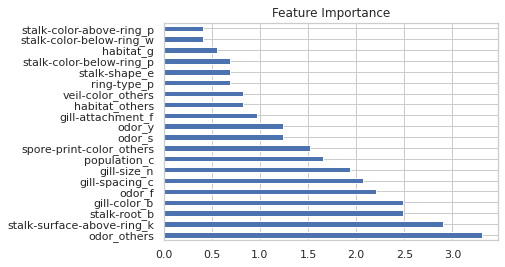

In [126]:
# Feature importance for SGDC (Coefficients as Feature Importance)
importance = SGDC.coef_[0]
feat_importances = pd.Series(importance, index = train_X.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

### 2.3 Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=0.2,random_state=1)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(test_X)
acc_rf = round(rf.score(test_X, test_y) * 100, 2)
print (str(acc_rf) + ' percent')

83.2 percent


In [128]:
precision_rf = metrics.precision_score(test_y, y_pred_rf)
recall_rf = metrics.recall_score(test_y, y_pred_rf)
f1_rf = metrics.f1_score(test_y, y_pred_rf)

print("Precision:",precision_rf)
print("Recall:",recall_rf)
print("F1:",f1_rf)

Precision: 0.8515406162464986
Recall: 0.7845161290322581
F1: 0.8166554734721289


In [129]:
compare_RMSE(rf,train_X, train_y,test_X,test_y)

Test set RMSE: 0.40987803063838396
CV RMSE: 0.38513846142293773
Training set RMSE: 0.3861345122067652


In [130]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

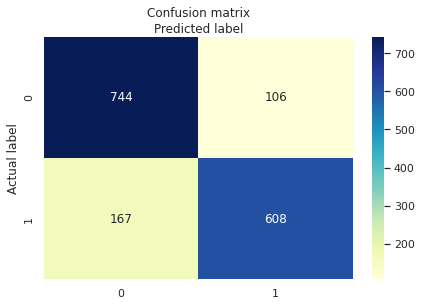

In [131]:
draw_confusion_matrix(rf,test_X,test_y)

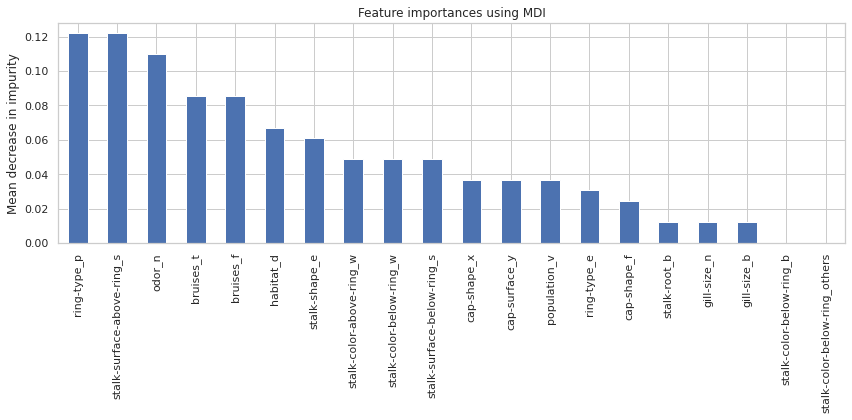

In [132]:
# Feature importance for Random Forest
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2.4 Decision Tree

In [133]:
dt = DecisionTreeClassifier(max_depth=10,
                           min_samples_leaf=0.18,
                           random_state=1)

# Fit dt to the training set
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
acc_dt = round(dt.score(test_X, test_y) * 100, 2)
print (str(acc_dt) + ' percent')

89.48 percent


In [134]:
precision_dt = metrics.precision_score(test_y, y_pred_dt)
recall_dt = metrics.recall_score(test_y, y_pred_dt)
f1_dt = metrics.f1_score(test_y, y_pred_dt)

print("Precision:",precision_dt)
print("Recall:",recall_dt)
print("F1:",f1_dt)

Precision: 1.0
Recall: 0.7793548387096774
F1: 0.8759970993473531


In [135]:
compare_RMSE(dt,train_X, train_y,test_X,test_y)

Test set RMSE: 0.3243929241379491
CV RMSE: 0.32465625369411877
Training set RMSE: 0.32465494127929284


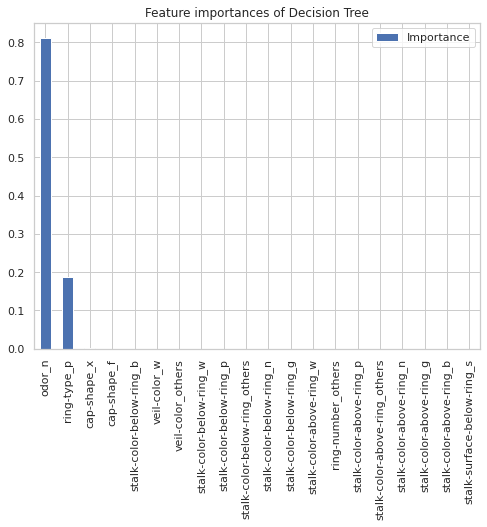

In [136]:
# dt.feature_importances_

feat_importances = pd.DataFrame(dt.feature_importances_, index=train_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances = feat_importances[:20]
feat_importances.plot(kind='bar', figsize=(8,6), title = "Feature importances of Decision Tree")

### 2.5 SVC

In [137]:
svc = SVC(kernel = 'linear')
svc.fit(train_X,train_y)
y_pred_svc = svc.predict(test_X)
acc_svc=round(svc.score(test_X,test_y)*100,2)
print(str(acc_svc)+' percent')

100.0 percent


In [138]:
precision_svc = metrics.precision_score(test_y, y_pred_svc)
recall_svc = metrics.recall_score(test_y, y_pred_svc)
f1_svc = metrics.f1_score(test_y, y_pred_svc)

print("Precision:",precision_svc)
print("Recall:",recall_svc)
print("F1:",f1_svc)

Precision: 1.0
Recall: 1.0
F1: 1.0


In [139]:
compare_RMSE(svc,train_X, train_y,test_X,test_y)

Test set RMSE: 0.0
CV RMSE: 0.0
Training set RMSE: 0.0


In [140]:
from sklearn.inspection import permutation_importance

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importance of SVC')
    plt.show()

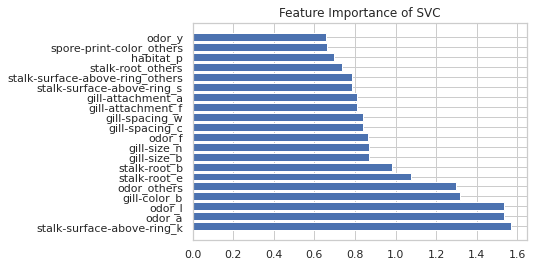

In [141]:
feature_names = train_X.columns
f_importances(abs(svc.coef_[0]), feature_names, top=20)

In [142]:
feature_names

Index(['cap-shape_f', 'cap-shape_k', 'cap-shape_others', 'cap-shape_x',
       'cap-surface_others', 'cap-surface_s', 'cap-surface_y', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_others', 'cap-color_w',
       'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_f', 'odor_l',
       'odor_n', 'odor_others', 'odor_s', 'odor_y', 'gill-attachment_a',
       'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b',
       'gill-size_n', 'gill-color_b', 'gill-color_g', 'gill-color_h',
       'gill-color_n', 'gill-color_others', 'gill-color_p', 'gill-color_u',
       'gill-color_w', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?',
       'stalk-root_b', 'stalk-root_e', 'stalk-root_others',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_others',
       'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_others', 'stalk-surface-below-ring_s',
       'stalk-color-above-ring_b', 'stalk-color-above-ring

In [143]:
models =pd.DataFrame({
    'Model':['Logistic Regression','SGDClassifier','Random Forest',
             'Decision Tree','SVC'],
    
    'Accuracy':[acc_log_reg,acc_SGDC ,acc_rf,acc_dt,acc_svc],
    'Recall':[recall_log_reg, recall_SGDC, recall_rf, recall_dt, recall_svc],
    'Precision':[precision_log_reg, precision_SGDC, precision_rf, precision_dt, precision_svc],
    'F1 Score':[f1_log_reg,f1_SGDC ,f1_rf,f1_dt,f1_svc],
})

models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy,Recall,Precision,F1 Score
1,SGDClassifier,100.00,1.000000,1.000000,1.000000
4,SVC,100.00,1.000000,1.000000,1.000000
0,Logistic Regression,99.94,0.998710,1.000000,0.999354
3,Decision Tree,89.48,0.779355,1.000000,0.875997
2,Random Forest,83.20,0.784516,0.851541,0.816655
